# Example of UNET module

In [1]:
import os
import numpy as np
import renom as rm
import matplotlib.pyplot as plt
from renom.cuda import set_cuda_active

from renom_img.api.segmentation.unet import UNet
from renom_img.api.utility.misc.display import draw_segment

set_cuda_active(True)

In [2]:
if not os.path.exists("VOCdevkit/VOC2007"):
    !wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
    !tar xfv VOCtrainval_06-Nov-2007.tar
    
if not os.path.exists("VOCdevkit/VOC2012"):
    !wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
    !tar xfv VOCtrainval_11-May-2012.tar

In [3]:
image_voc_2007 = "VOCdevkit/VOC2007/JPEGImages/"
label_voc_2007 = "VOCdevkit/VOC2007/SegmentationClass/"
image_voc_2012 = "VOCdevkit/VOC2012/JPEGImages/"
label_voc_2012 = "VOCdevkit/VOC2012/SegmentationClass/"

train_voc_2007 = [line.strip() for line in open("VOCdevkit/VOC2007/ImageSets/Segmentation/train.txt").readlines()]
train_voc_2007 += [line.strip() for line in open("VOCdevkit/VOC2007/ImageSets/Segmentation/val.txt").readlines()]
train_voc_2012 = [line.strip() for line in open("VOCdevkit/VOC2012/ImageSets/Segmentation/train.txt").readlines()]
valid_voc_2012 = [line.strip() for line in open("VOCdevkit/VOC2012/ImageSets/Segmentation/val.txt").readlines()]

train_image_path_list = []
train_label_path_list = []
valid_image_path_list = []
valid_label_path_list = []

# Use training dataset of VOC2007, VOC2012 and validation dataset of 2007 as training data.
for path in train_voc_2007:
    train_image_path_list.append(os.path.join(image_voc_2007, path+'.jpg'))
    train_label_path_list.append(os.path.join(label_voc_2007, path+'.png'))

for path in train_voc_2012:
    train_image_path_list.append(os.path.join(image_voc_2012, path+'.jpg'))
    train_label_path_list.append(os.path.join(label_voc_2012, path+'.png'))

# Use validation dataset of VOC2012 as validation data.
for path in valid_voc_2012:
    valid_image_path_list.append(os.path.join(image_voc_2012, path+'.jpg'))
    valid_label_path_list.append(os.path.join(label_voc_2012, path+'.png'))

class_map = [
    "aeroplane", 
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "diningtable",
    "dog",
    "horse",
    "motorbike",
    "person",
    "pottedplant",
    "sheep",
    "sofa",
    "train",
    "tvmonitor",
]

In [4]:
model = UNet(class_map, imsize=(136, 136), train_whole_network=True)

Epoch:000 Avg Train Loss:2.826 Avg Valid Loss:2.516: : 209it [01:22,  6.14it/s]


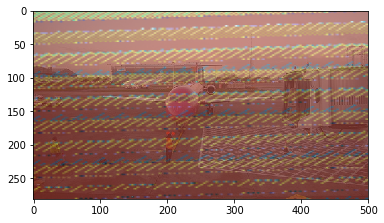

Epoch:001 Avg Train Loss:5.998 Avg Valid Loss:5.652: : 209it [01:21,  5.95it/s]


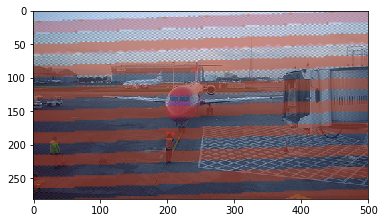

Epoch:002 Avg Train Loss:6.025 Avg Valid Loss:6.048: : 209it [01:22,  6.11it/s]


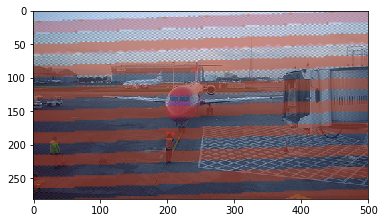

Epoch:003 Train Loss:6.071:   5%|▌         | 6/118 [00:03<01:03,  1.77it/s]

KeyboardInterrupt: 

In [5]:
def callback(*args):
    plt.imshow(draw_segment(train_image_path_list[0], model.predict(train_image_path_list[0])))
    plt.show()

model.fit(train_img_path_list=train_image_path_list, train_annotation_path_list=train_label_path_list,
         valid_img_path_list=valid_image_path_list, valid_annotation_path_list=valid_label_path_list,
          callback_end_epoch=callback
         )

In [ ]:
draw_segment(train_image_path_list[0], model.predict(train_image_path_list[0]))